In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data = np.load('/content/2_seg.npy', allow_pickle=True)
print("Shape:", data.shape)
print("Dtype:", data.dtype)
print("Number of dimensions:", data.ndim)
print("Size (количество элементов):", data.size)

Shape: (700, 700)
Dtype: int64
Number of dimensions: 2
Size (количество элементов): 490000


In [20]:
unique_values = np.unique(data)
print("Unique values in the array:", unique_values)

Unique values in the array: [ 0  2  3  5  6 10 11 12 14 15 19 20 21]


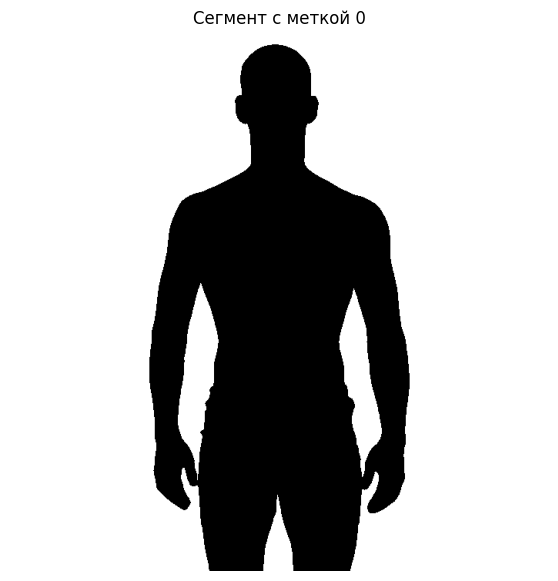

In [25]:
# Выберем сегмент с меткой 10
label = 0
mask = (data == label)

plt.figure(figsize=(7, 7))
plt.imshow(mask, cmap='gray'ер)  # Будет видно, где присутствует сегмент
plt.title(f"Сегмент с меткой {label}")
plt.axis('off')
plt.show()

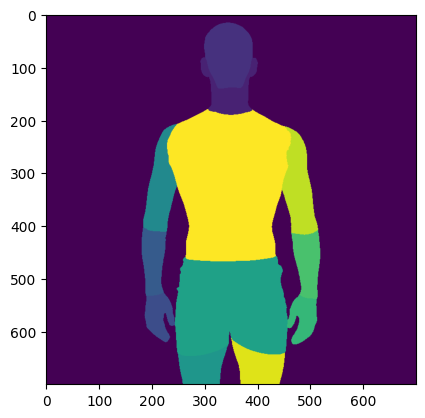

In [21]:
plt.imshow(data) #, cmap='gray')
# plt.axis('off')
plt.show()

In [28]:
data1 = np.load('/content/123_seg.npy', allow_pickle=True)
print("Shape:", data1.shape)
print("Dtype:", data1.dtype)
print("Number of dimensions:", data1.ndim)
print("Size (количество элементов):", data1.size)

data2 = np.load('/content/20_seg.npy', allow_pickle=True)
print("Shape:", data2.shape)
print("Dtype:", data2.dtype)
print("Number of dimensions:", data2.ndim)
print("Size (количество элементов):", data2.size)

Shape: (4500, 3000)
Dtype: int64
Number of dimensions: 2
Size (количество элементов): 13500000
Shape: (1101, 1500)
Dtype: int64
Number of dimensions: 2
Size (количество элементов): 1651500


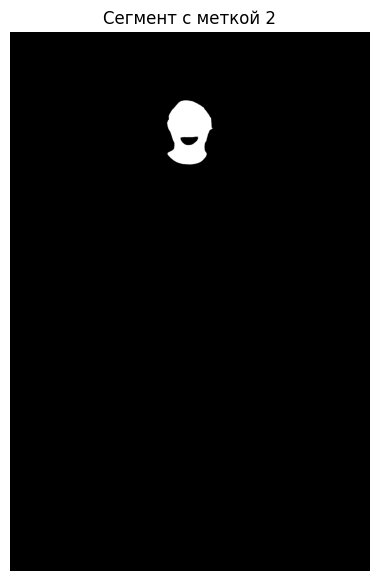

In [30]:
# Выберем сегмент с меткой 10
label = 2
mask = (data1 == label)

plt.figure(figsize=(7, 7))
plt.imshow(mask, cmap='gray')  # Будет видно, где присутствует сегмент
plt.title(f"Сегмент с меткой {label}")
plt.axis('off')
plt.show()

Unique labels in segmentation: [ 0  1  2  5  6 10 11 12 14 15 19 20 21 22]


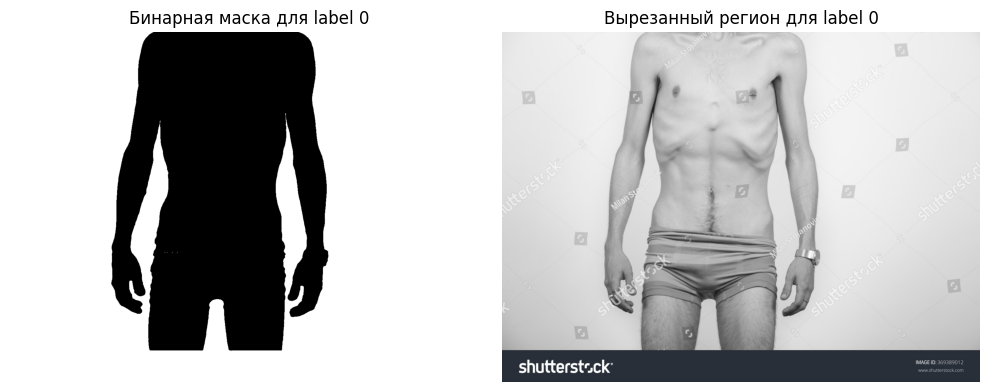

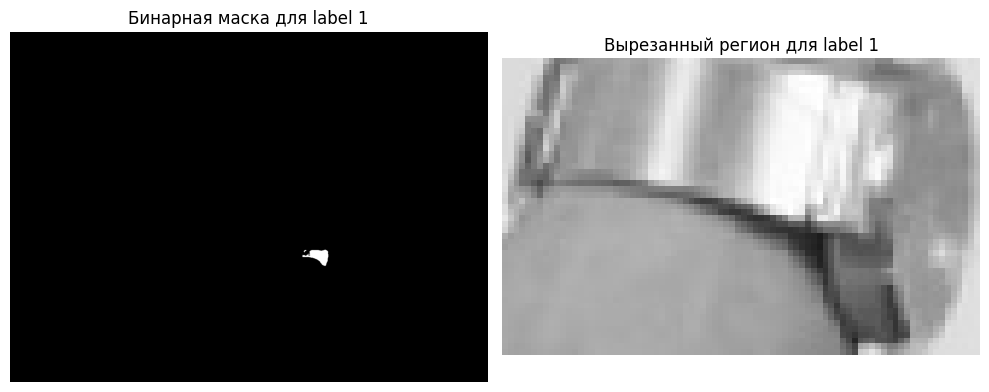

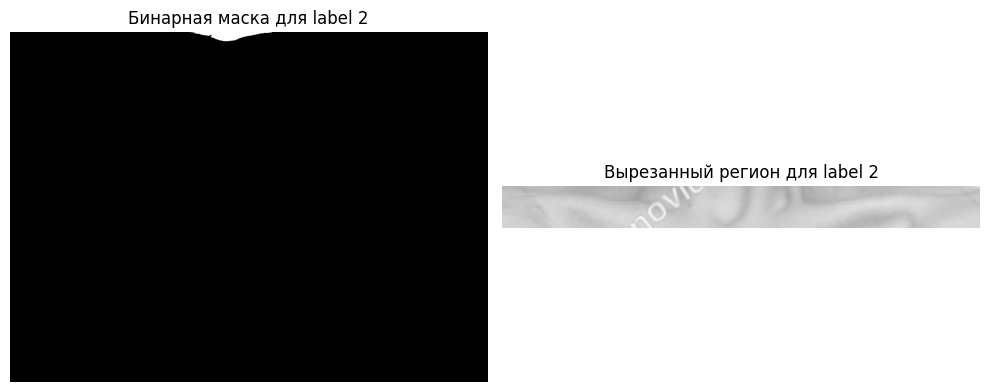

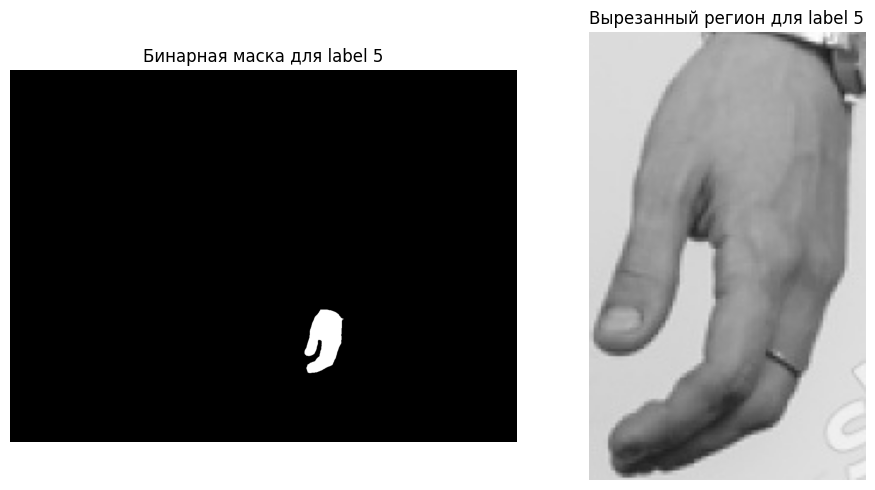

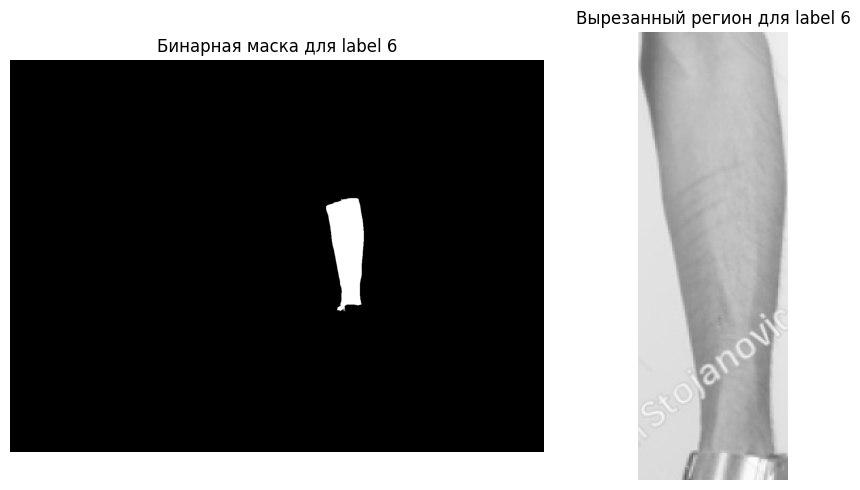

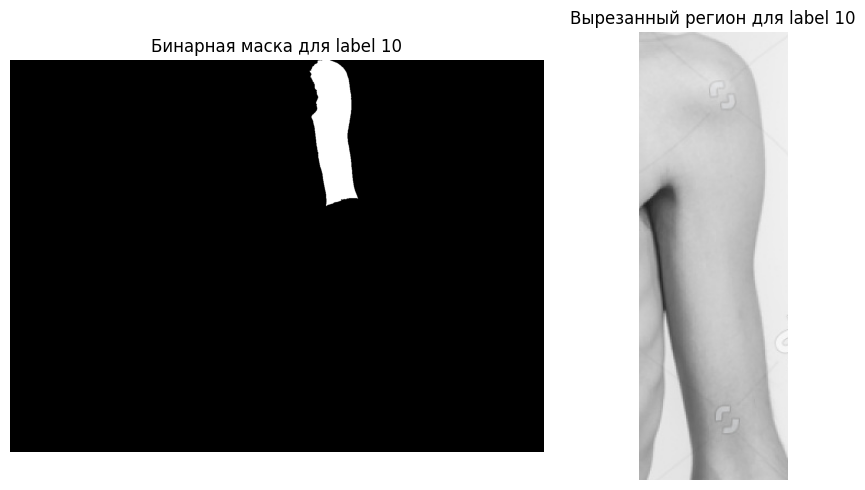

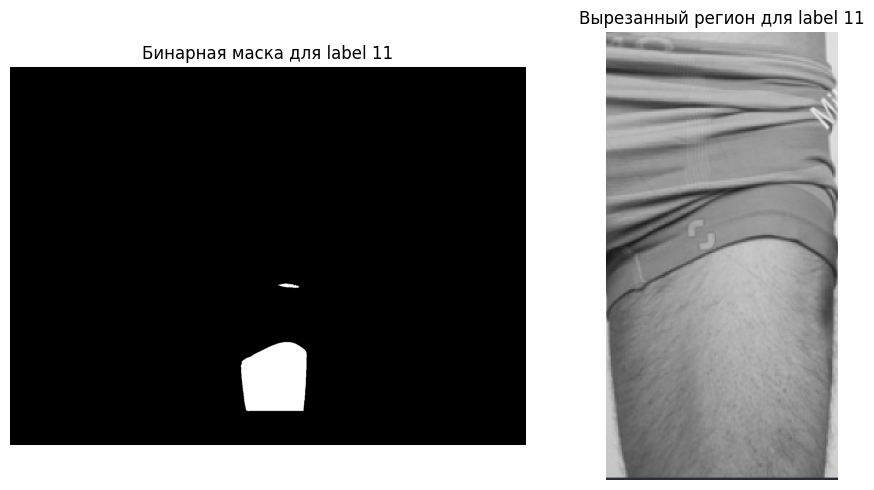

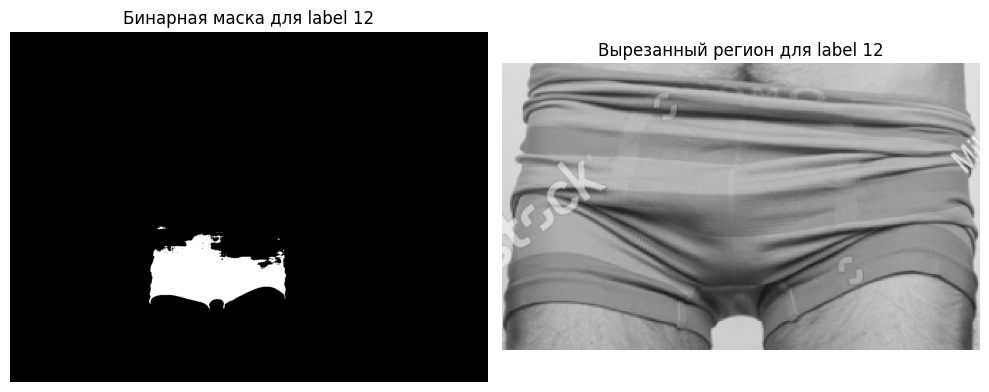

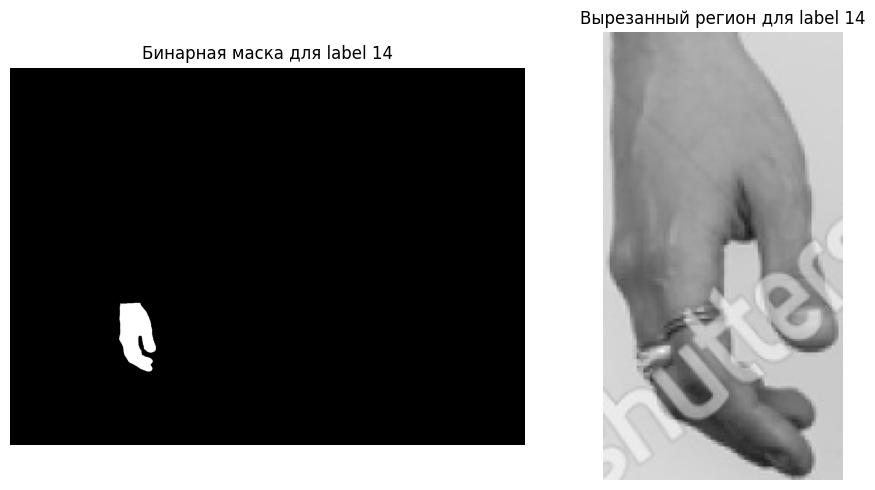

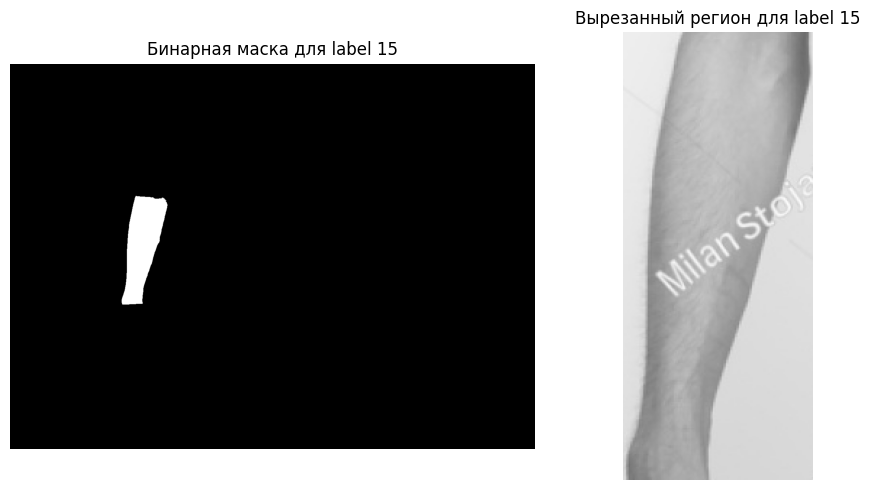

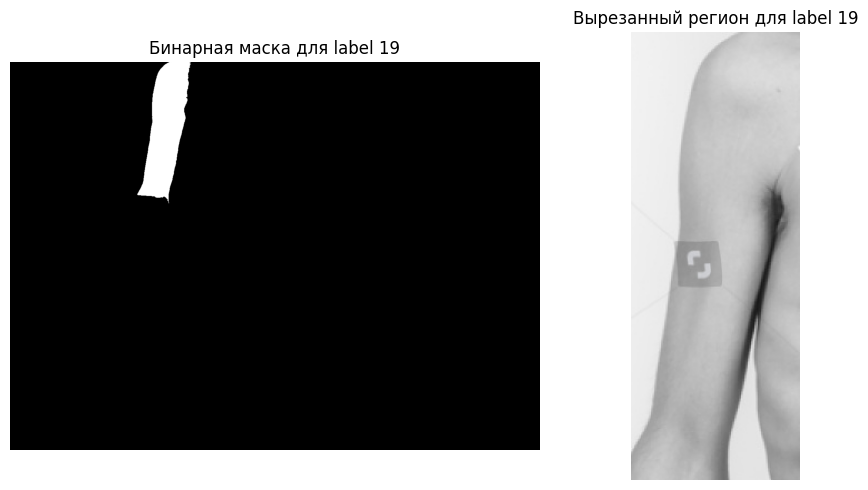

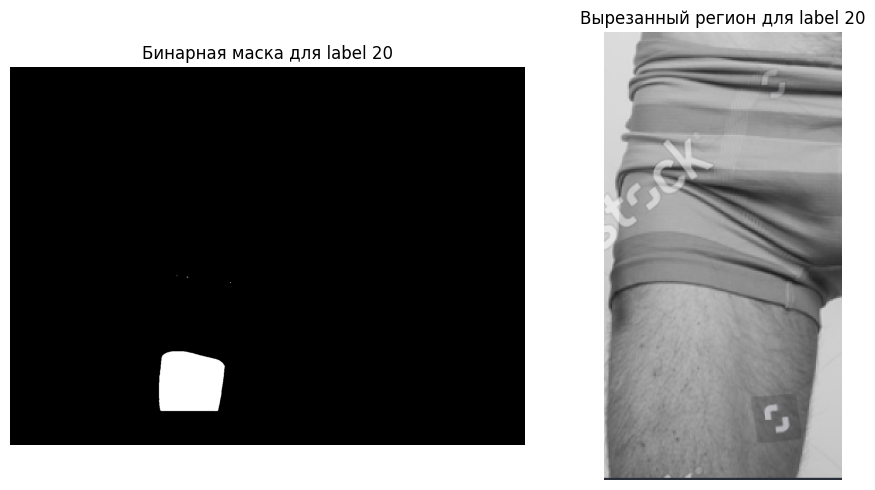

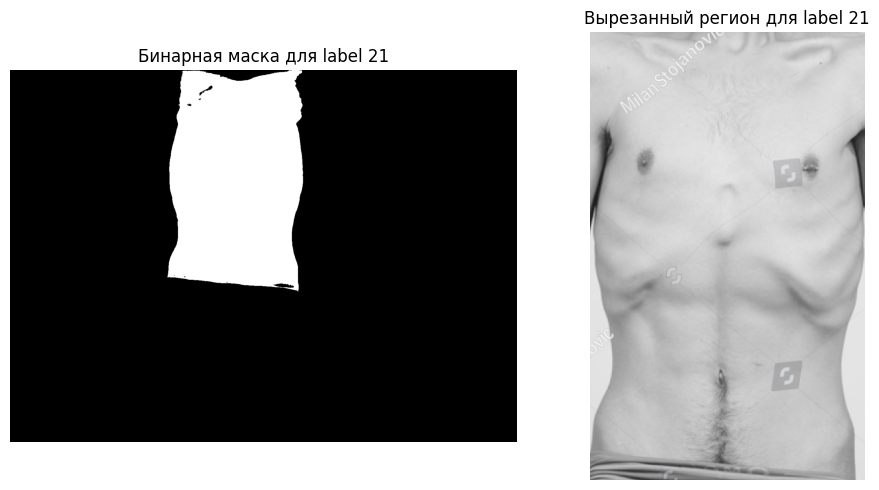

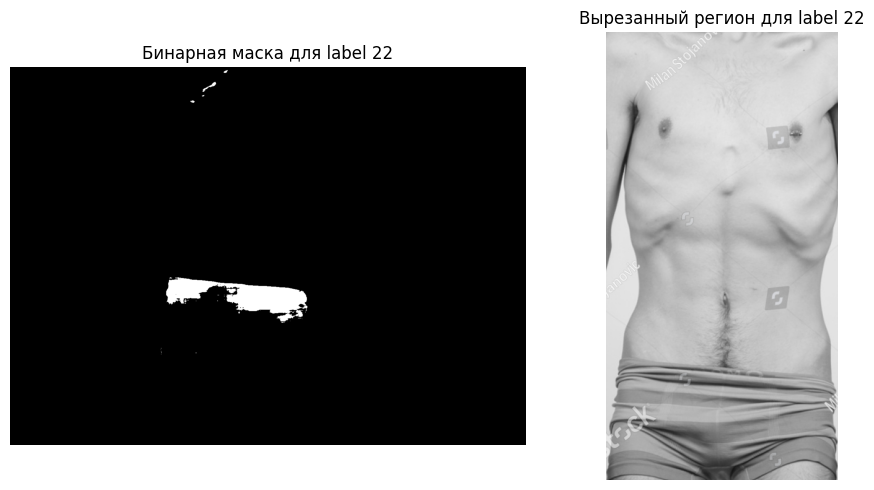

In [39]:


import numpy as np
import cv2
import matplotlib.pyplot as plt

# -----------------------------
# Задайте пути к файлам:
seg_file = '/content/20_seg.npy'         # Файл сегментации (.npy)
img_file = '/content/20.png'       # Оригинальное изображение

# -----------------------------
# 1. Загрузка сегментации и оригинального изображения
# Загружаем массив сегментации
segmentation = np.load(seg_file, allow_pickle=True)

# Загружаем оригинальное изображение (cv2 читает в формате BGR)
original_img = cv2.imread(img_file)
if original_img is None:
    raise FileNotFoundError(f"Не найдено изображение по пути: {img_file}")

# Преобразуем изображение в формат RGB для корректного отображения через matplotlib
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# -----------------------------
# 2. Проверка размеров
if segmentation.shape[:2] != original_img.shape[:2]:
    raise ValueError("Размеры сегментации и оригинального изображения не совпадают!")

# -----------------------------
# 3. Получение уникальных меток сегментов
unique_labels = np.unique(segmentation)
print("Unique labels in segmentation:", unique_labels)

# -----------------------------
# 4. Для каждой метки создаём бинарную маску, находим bounding box и обрезаем изображение
for label in unique_labels:
    # Создаём бинарную маску: 1, если значение равно label, иначе 0
    mask = (segmentation == label).astype(np.uint8)

    # Получаем координаты всех пикселей, где маска равна 1
    coords = np.column_stack(np.where(mask > 0))
    if coords.size == 0:
        continue  # Если сегмента с данной меткой нет, переходим к следующей

    # Находим минимальные и максимальные координаты (bounding box)
    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0)

    # Обрезаем оригинальное изображение по вычисленному bounding box
    # +1 к y_max и x_max, чтобы включить последний пиксель
    cropped_img = original_img[y_min:y_max+1, x_min:x_max+1]

    # -----------------------------
    # 5. Отображение результата
    # Отобразим бинарную маску и обрезанный регион изображения
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(mask, cmap='gray')
    axes[0].set_title(f"Бинарная маска для label {label}")
    axes[0].axis('off')

    axes[1].imshow(cropped_img)
    axes[1].set_title(f"Вырезанный регион для label {label}")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    # Если нужно сохранить, можно раскомментировать и задать путь:
    cv2.imwrite(f"cropped_label_{label}.png", cv2.cvtColor(cropped_img, cv2.COLOR_RGB2BGR))



In [34]:
import cv2

img = cv2.imread('/content/20.png', cv2.IMREAD_UNCHANGED)
print("Shape:", img.shape)

img = cv2.imread('/content/photo_2025-01-25_00-57-05.jpg', cv2.IMREAD_UNCHANGED)
print("Shape:", img.shape)
# видно что моя модель удаления фона добавляет альфа канал

img = cv2.imread('/content/2.png', cv2.IMREAD_UNCHANGED)
print("Shape:", img.shape)

Shape: (1101, 1500, 4)
Shape: (1280, 720, 3)
Shape: (700, 700, 4)
